In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
from datetime import date, timedelta

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df= pd.read_csv('data/india-new.csv')

df = df[df['diagnosed_date']<=date.today().strftime('%d-%m-%Y')]

In [3]:
df.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,current_status,...,source2,source3,backup,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
1,2,2,KL-AL-P1,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,KL-KS-P1,03-02-2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,DL-P1,02-03-2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,TS-P1,02-03-2020,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,6,NaN,03-03-2020,69.0,M,Jaipur,Jaipur,Rajasthan,Recovered,...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(901, 25)

In [5]:
# check missing values
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
13,status_change,3
10,notes,5
14,source1,6
7,detected_district,103
6,detected_city,314
15,source2,424
5,gender,436
4,age,481
12,nationality,497
17,backup,542


In [6]:
# treat age outliers
col = 'age'
fmean = df[col].mean()
fstd = df[col].std()
df.ix[np.abs(df[col]-fmean) > (3*fstd), col] = fmean + (3*fstd)  # treat upper outliers
df.ix[np.abs(df[col]-fmean) < -(3*fstd), col] = -(fmean + (3*fstd)) # treat lower outliers

# missing age filled with median
df[col].fillna(df[col].median(), inplace=True) 

# mark missing data
df['gender'].fillna('NA', inplace=True) 
df['nationality'].fillna('India', inplace=True) 
df['detected_district'].fillna('NA', inplace=True) 
df['detected_city'].fillna('NA', inplace=True) 

In [7]:
df.describe()

,id,unique_id,age,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,901.000000,901.000000,901.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,452.000000,452.000000,38.309408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,260.240594,260.240594,12.110430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,227.000000,227.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,452.000000,452.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,677.000000,677.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,902.000000,902.000000,92.777001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe(include=['O'])

,government_id,diagnosed_date,gender,detected_city,detected_district,detected_state,current_status,notes,contracted_from,nationality,status_change,source1,source2,source3,backup
count,222,901,901,901,901,901,901,896,214,901,898,895,477,109,359
unique,220,29,3,167,134,27,4,424,78,8,27,316,179,61,219
top,KL-PT-P1,27-03-2020,NA,NA,NA,Kerala,Hospitalized,Details awaited,P182,India,27-03-2020,https://twitter.com/PTI_News/status/1243519189...,https://www.facebook.com/permalink.php?story_f...,https://punjabupdate.com/8-new-cases-of-covid-...,Details awaited
freq,2,151,436,314,103,175,856,129,16,856,169,39,34,8,33


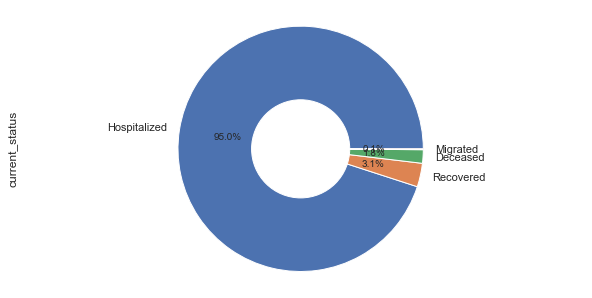

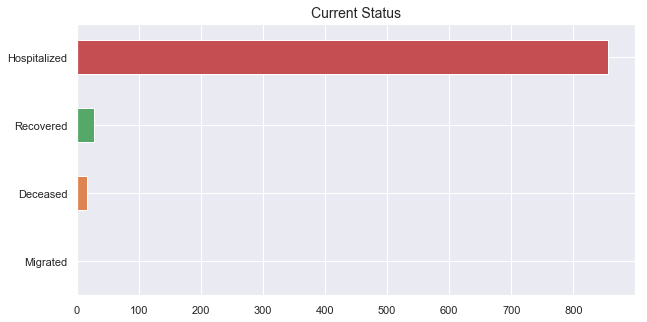

In [9]:
col = 'current_status'

# charts of current status


# pie plot for current status
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for current status
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Current Status', fontsize=14)

plt.show()

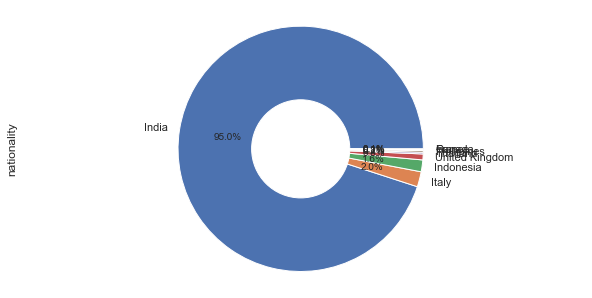

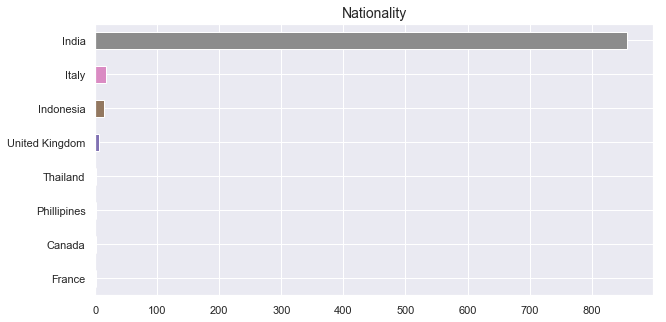

In [10]:
col = 'nationality'

# charts of nationality

# pie plot for nationality
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for nationality
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Nationality', fontsize=14)
plt.show()

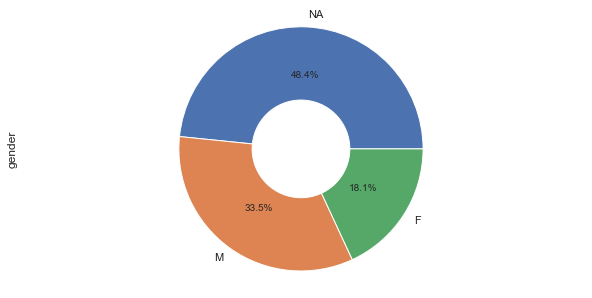

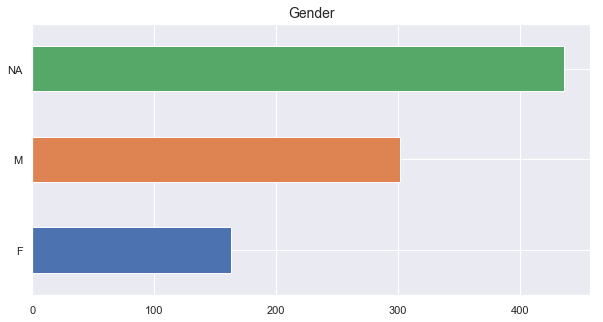

In [11]:
col = 'gender'

# charts of gender

# pie plot for gender
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for gender
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Gender', fontsize=14)
plt.show()

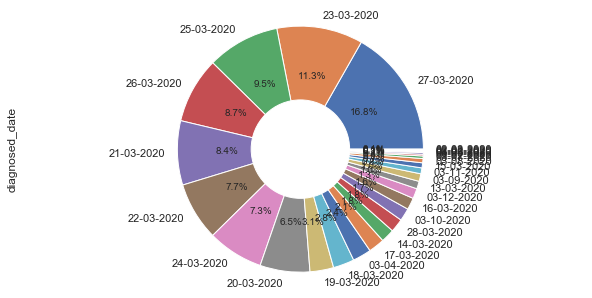

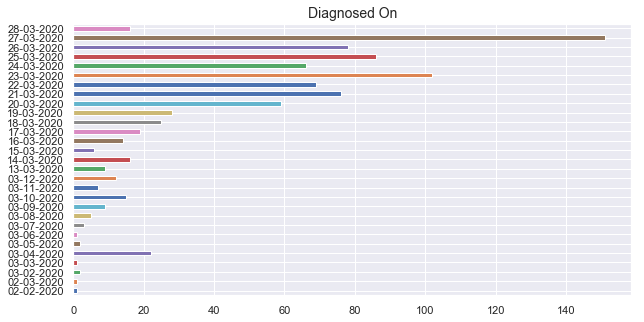

In [12]:
df["diagnosed_date"] = pd.to_datetime(df["diagnosed_date"]).dt.strftime('%d-%m-%Y')

col = 'diagnosed_date'

# charts of diagnosed date

# pie plot for diagnosed date
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for diagnosed date
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts().sort_index().plot(kind='barh', figsize=(10,5))
plt.title('Diagnosed On', fontsize=14)
plt.show()

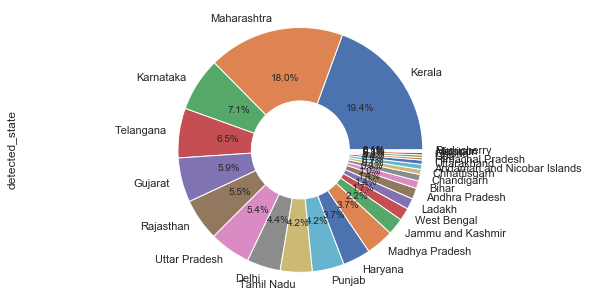

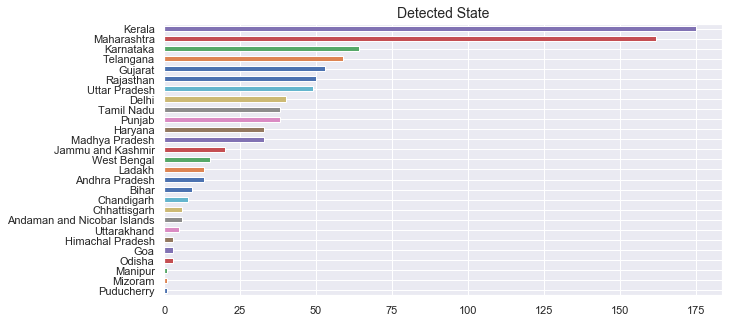

In [13]:
col = 'detected_state'

# charts of detected state

# pie plot for detected state
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected state
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Detected State', fontsize=14)
plt.show()

In [14]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['current_status'] == 'Hospitalized']['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['current_status'] == 'Recovered']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['current_status'] == 'Deceased']['diagnosed_date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Hospitalized','Recovered','Deceased']

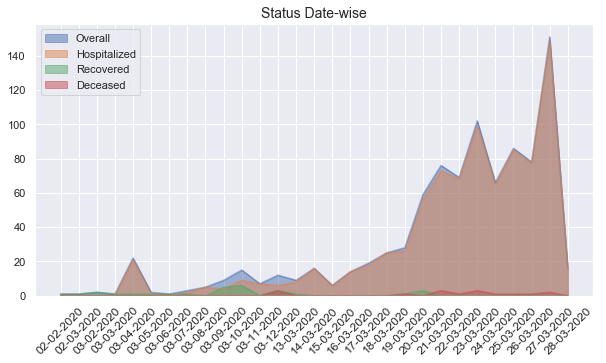

In [15]:
# Detection State-wise
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()

In [16]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Hospitalized_CumSum'] = tmp['Hospitalized'].cumsum()
tmp_cumsum['Recovered_CumSum'] = tmp['Recovered'].cumsum()
tmp_cumsum['Deceased_CumSum'] = tmp['Deceased'].cumsum()


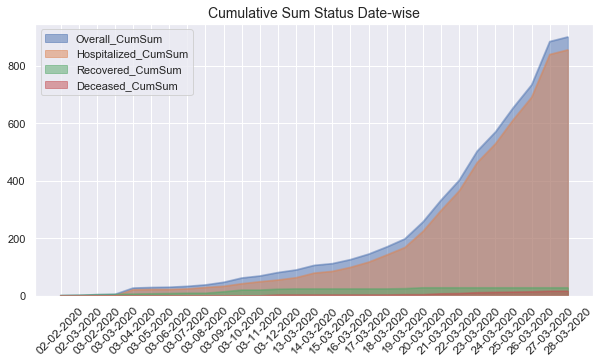

In [17]:
# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Status Date-wise', fontsize=14)
plt.show()

In [18]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['detected_state'] == 'Kerala']['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['detected_state'] == 'Maharashtra']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Karnataka']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Telangana']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Delhi']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Uttar Pradesh']['diagnosed_date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Kerala','Maharashtra','Karnataka','Telangana','Delhi','Uttar Pradesh']

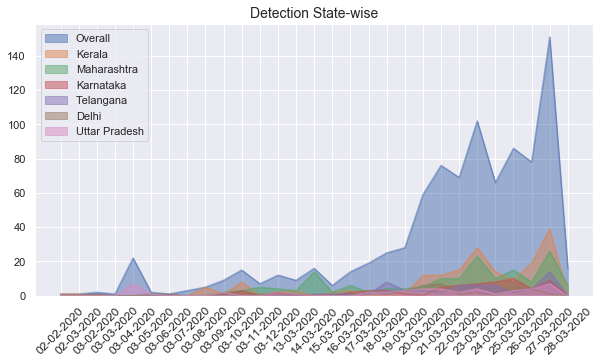

In [19]:
# Detection State-wise
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Detection State-wise', fontsize=14)
plt.show()

In [20]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
#tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Maharashtra_CumSum'] = tmp['Maharashtra'].cumsum()
tmp_cumsum['Kerala_CumSum'] = tmp['Kerala'].cumsum()
tmp_cumsum['Karnataka_CumSum'] = tmp['Karnataka'].cumsum()
tmp_cumsum['Telangana_CumSum'] = tmp['Telangana'].cumsum()
tmp_cumsum['Delhi_CumSum'] = tmp['Delhi'].cumsum()
tmp_cumsum['Uttar Pradesh_CumSum'] = tmp['Uttar Pradesh'].cumsum()

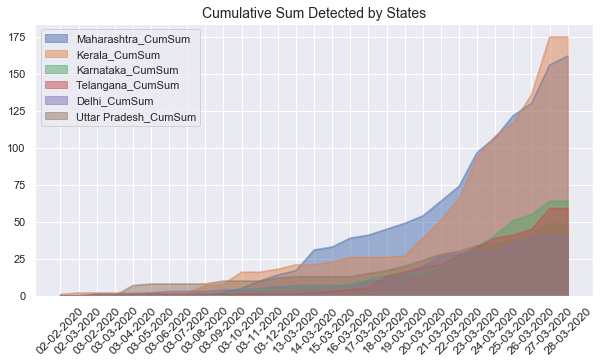

In [21]:
# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Detected by States', fontsize=14)
plt.show()

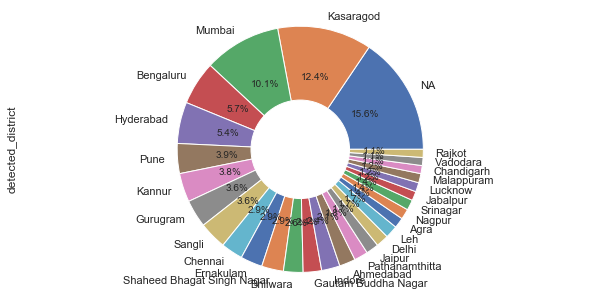

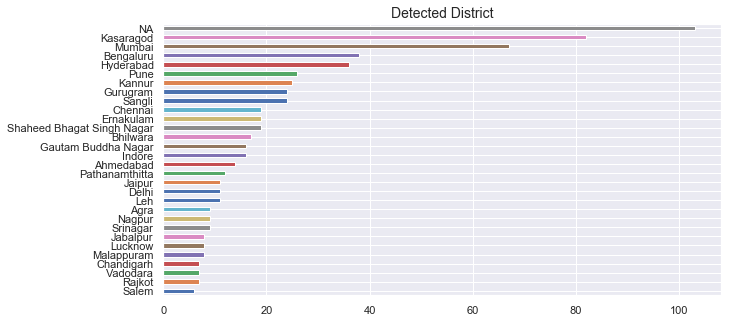

In [22]:
col = 'detected_district'

# charts of detected district

# pie plot for detected district
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected district
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected District', fontsize=14)
plt.show()

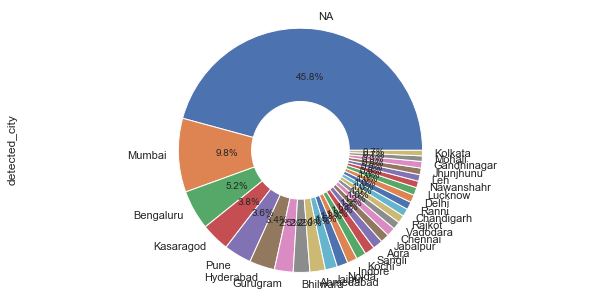

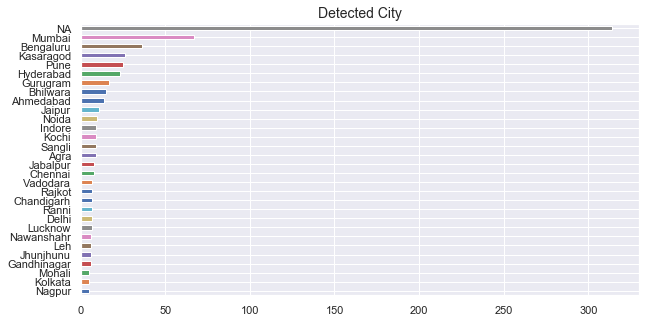

In [23]:
col = 'detected_city'

# charts of detected city

# pie plot for detected city
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected city
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected City', fontsize=14)
plt.show()

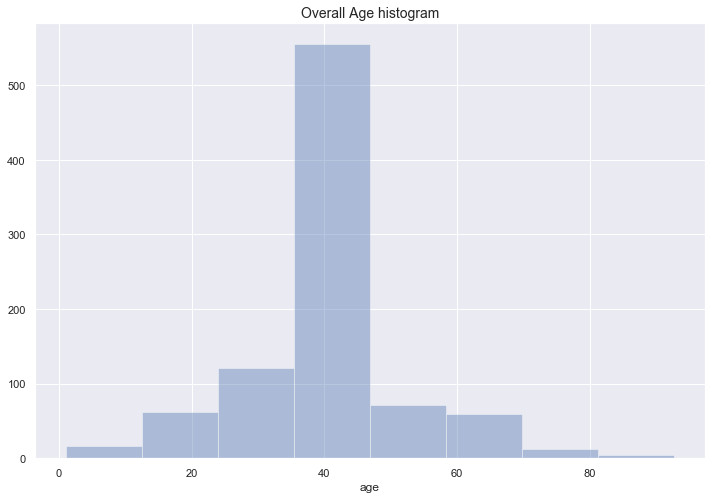

In [24]:
col = 'age'
# age histogram
plt.figure(figsize=(12,8))
sns.distplot(df[col].values, bins=8, kde=False)
plt.xlabel(col, fontsize=12)
plt.title('Overall Age histogram', fontsize=14)
plt.show()

In [25]:
df['current_status'].value_counts()

Hospitalized    856
Recovered        28
Deceased         16
Migrated          1
Name: current_status, dtype: int64

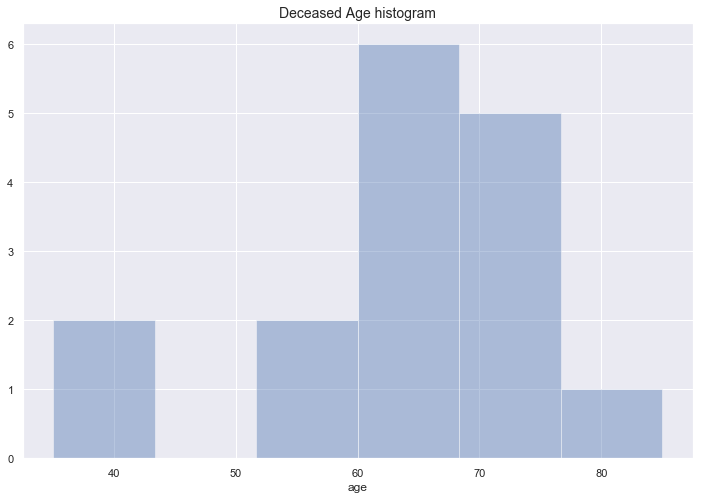

In [26]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Deceased']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=6, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Deceased Age histogram', fontsize=14)
plt.show()

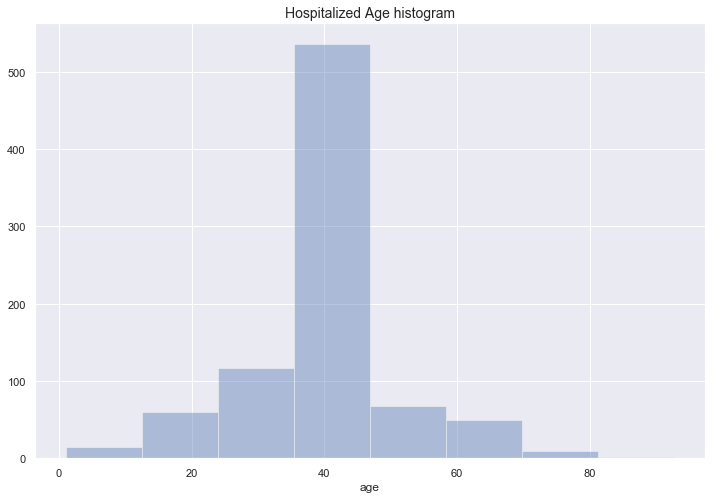

In [27]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Hospitalized']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Hospitalized Age histogram', fontsize=14)
plt.show()

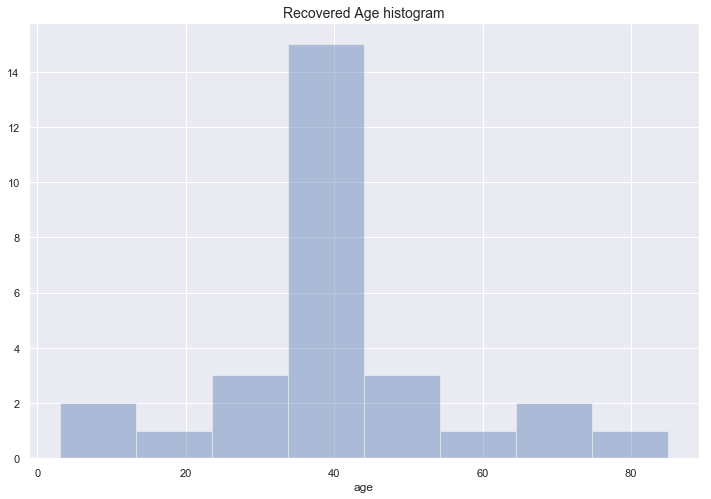

In [28]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Recovered']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Recovered Age histogram', fontsize=14)
plt.show()